# Online Learning Project #
This project uses the data in the following link: https://www.kaggle.com/marlonferrari/elearning-student-reactions
The data is a real data that shows the reactions of the students to the e-learning and their achievements in several skills.

In [322]:
import pandas as pd 
#load the data file "online_classroom_data"
online = pd.read_csv("online_classroom_data.csv",sep = ',') 
# Preview the first 5 lines of the loaded data 
online.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


In [323]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [324]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
Unnamed: 0            71 non-null int64
total_posts           71 non-null float64
helpful_post          71 non-null float64
nice_code_post        71 non-null float64
collaborative_post    71 non-null float64
confused_post         71 non-null float64
creative_post         71 non-null float64
bad_post              71 non-null float64
amazing_post          71 non-null float64
timeonline            71 non-null float64
sk1_classroom         71 non-null object
sk2_classroom         71 non-null object
sk5_classroom         71 non-null object
sk3_classroom         71 non-null object
sk4_classroom         71 non-null object
Approved              71 non-null int64
dtypes: float64(9), int64(2), object(5)
memory usage: 9.0+ KB


In [325]:
online["sk1_classroom"] = online["sk1_classroom"].str.replace(",",".").astype(float)
online["sk2_classroom"] = online["sk2_classroom"].str.replace(",",".").astype(float)
online["sk3_classroom"] = online["sk3_classroom"].str.replace(",",".").astype(float)
online["sk4_classroom"] = online["sk4_classroom"].str.replace(",",".").astype(float)
online["sk5_classroom"] = online["sk5_classroom"].str.replace(",",".").astype(float)

In [326]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
Unnamed: 0            71 non-null int64
total_posts           71 non-null float64
helpful_post          71 non-null float64
nice_code_post        71 non-null float64
collaborative_post    71 non-null float64
confused_post         71 non-null float64
creative_post         71 non-null float64
bad_post              71 non-null float64
amazing_post          71 non-null float64
timeonline            71 non-null float64
sk1_classroom         71 non-null float64
sk2_classroom         71 non-null float64
sk5_classroom         71 non-null float64
sk3_classroom         71 non-null float64
sk4_classroom         71 non-null float64
Approved              71 non-null int64
dtypes: float64(14), int64(2)
memory usage: 9.0 KB


In [327]:
online.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,2.1,2.4,3.5,3.6,1.7,0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,0.3,0.3,0.0,0.1,0.2,0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8.0,5.0,5.0,7.0,5.0,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6.0,5.0,4.0,6.0,4.0,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,8.7,9.0,6.5,10.0,8.8,1


In [328]:
X= online.drop(['sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom','sk5_classroom','Approved','Unnamed: 0'],axis=1)
X=X.loc[X.timeonline != '0']
Y = online[['sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom','sk5_classroom']]
#from sklearn.preprocessing import StandardScaler
Y=Y.sum(axis=1)
Y.head()

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0    13.3
1     0.9
2    30.0
3    25.0
4    43.0
dtype: float64

Random forest algorithm is the main actor in our search and it is not effected by normalization. However, SVR may be effected by scaling since it relies on the distances of the data points.

In [329]:
online=online.loc[online.timeonline != '0']
online.describe()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,35.000000,5.507042,4.028169,7.478873,11.366197,0.549296,18.309859,0.056338,18.957746,10279.126761,5.246479,5.078873,4.788732,5.445070,6.878873,0.704225
std,20.639767,6.480461,6.843082,12.746831,13.970622,1.350013,21.930795,0.287219,22.086477,10176.243372,3.324190,3.273396,3.448252,3.564459,3.856198,0.459639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,2.000000,0.000000,0.000000,1.500000,0.000000,6.500000,0.000000,7.000000,1627.500000,2.150000,2.050000,0.500000,1.150000,4.500000,0.000000
50%,35.000000,4.000000,3.000000,2.000000,7.000000,0.000000,14.000000,0.000000,16.000000,7664.000000,6.000000,5.700000,5.000000,6.700000,8.700000,1.000000
75%,52.500000,7.500000,5.500000,12.500000,16.000000,0.000000,24.000000,0.000000,25.500000,16574.000000,8.000000,8.000000,8.000000,8.000000,9.600000,1.000000
max,70.000000,46.000000,53.000000,90.000000,89.000000,7.000000,150.000000,2.000000,155.000000,43612.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Here, we realize that the timeonline is zero for many students and they are not approved totally. So, we want to deal with the students who are participating the e-learning platform and we drop the rows which are for students with timeonline zero.

Saving figure attribute_histogram_plots_online


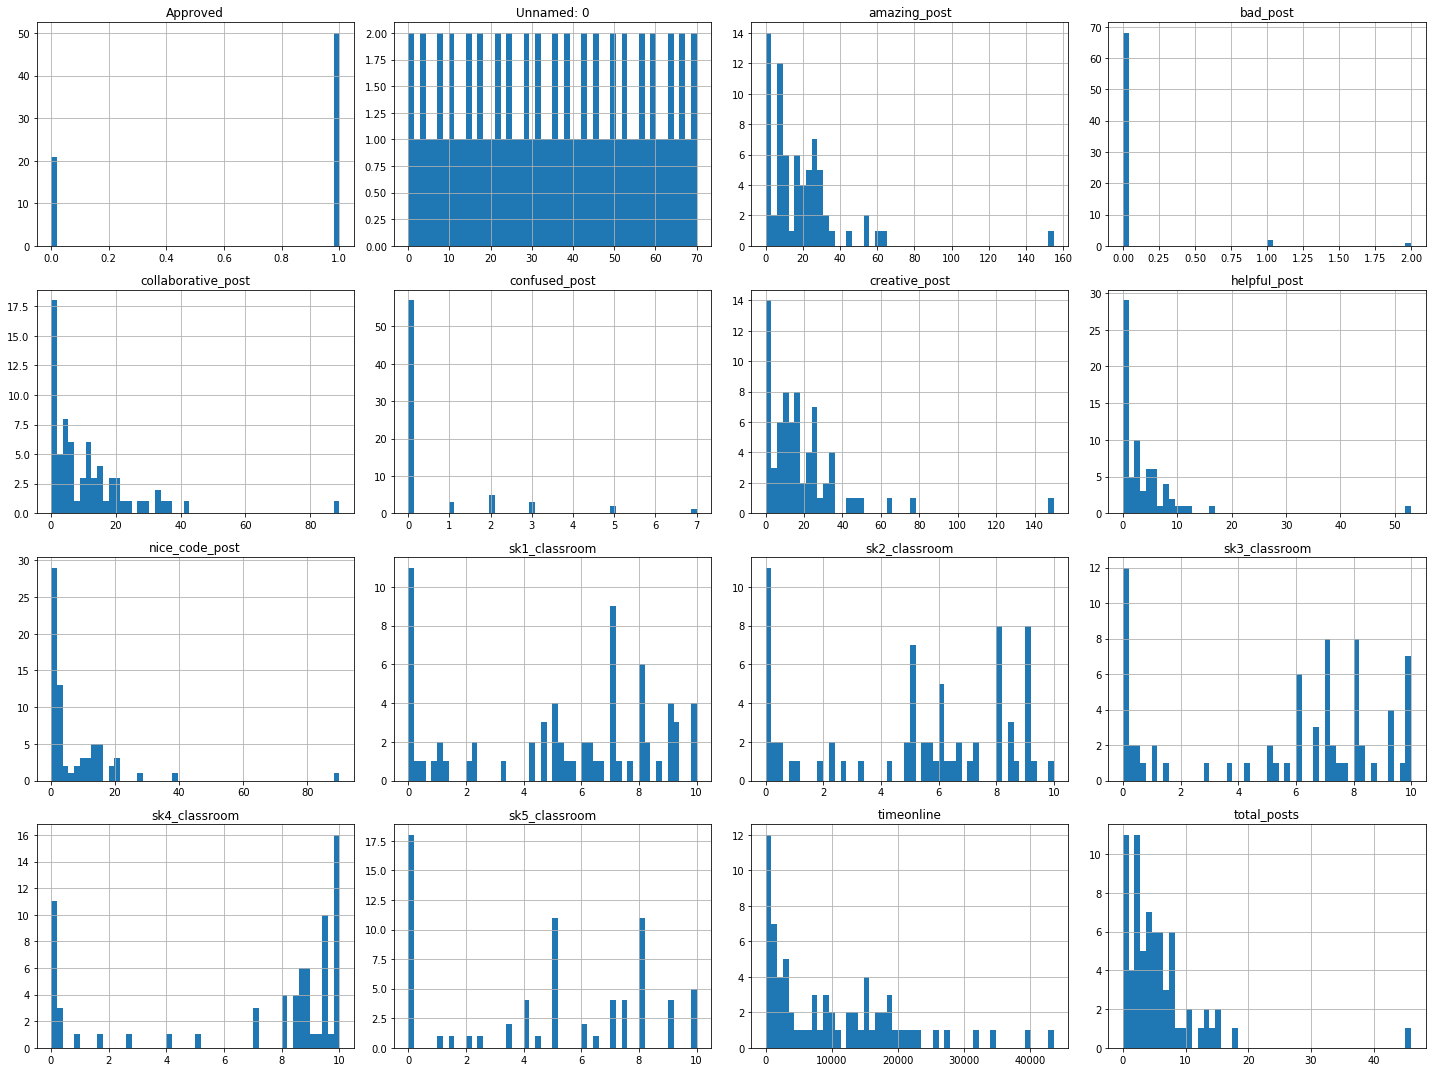

In [330]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
online.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_online")
plt.show()

Here, we realize that there is an outlier or some outliers in values of some of features.

# Feature Importance Table #
At that point we have many choices to go on deeper. First way will be a regression tree to observe the most important features on the dataset. Let us start with plotting total skills point value for the whole paprticipants.

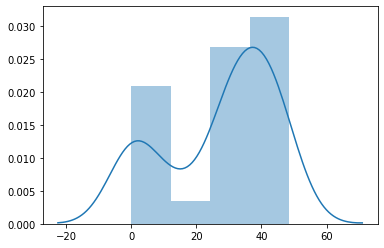

In [331]:
import seaborn as sns
sns.distplot(Y)
plt.show()

A random forest algorithm is shortly a collection of decision trees. 

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [333]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 8.60
Mean Squared Error (MSE): 136.71
Root Mean Squared Error (RMSE): 11.69


In [334]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred))) / max(y_true) * 100

In [335]:
mape = mean_absolute_percentage_error(y_test, rf.predict(X_test))
print('Mean Absolute Error (MAE): %.2f' % mape)

Mean Absolute Error (MAE): 20.00


In [336]:
y_train.describe()

count    49.000000
mean     28.312245
std      17.406520
min       0.000000
25%      11.000000
50%      33.000000
75%      42.400000
max      48.500000
dtype: float64

Here, MAPE is useful to comment on errors. We implemented it here to calculate MAPE of the evaluation of the random forest model. Classical MAPE gave infinity as a results because of dividing by zero. However, dividing by the maximum of true labels vector gave the %20 error. Also, this is not completely satisfying amount of error for such an error computing formula. So, we will focus on outliers firstly.

In [337]:
X[X['amazing_post']>=100]

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline
66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0,39314.0


In [338]:
X[X['collaborative_post']>=80]

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline
66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0,39314.0


In [339]:
X[X['helpful_post']>=50]

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline
66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0,39314.0


In [340]:
X[X['creative_post']>=100]

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline
66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0,39314.0


In [341]:
X[X['nice_code_post']>=80].index

Int64Index([66], dtype='int64')

Now, we decide to get the extraordinary student with number 66 out of the set. He/ She is an outlier for this dataset.

In [342]:
X=X[X.index!=66]
Y=Y[Y.index!=66]

In [343]:
Y=np.array(Y)
Y=Y.reshape(-1, 1)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)
mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 7.31
Mean Squared Error (MSE): 109.14
Root Mean Squared Error (RMSE): 10.45


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Here, we had smaller errors by taking the outlier out, but the percentage error is not that better.

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error (MAE): 7.36
Mean Squared Error (MSE): 108.00
Root Mean Squared Error (RMSE): 10.39


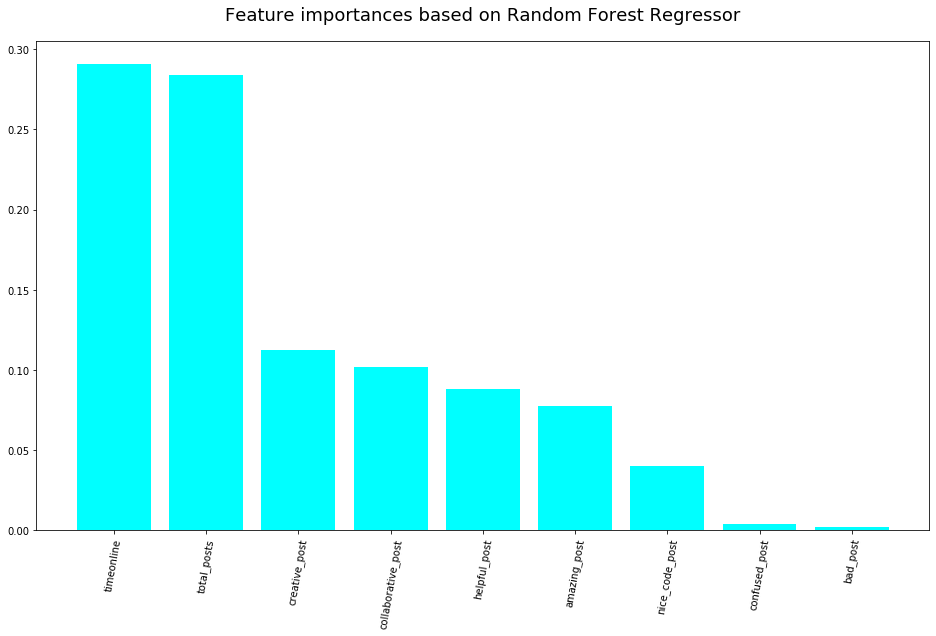

In [345]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 8, random_state=42)
rf.fit(X_train, y_train)

mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
plt.figure(figsize=(16, 9))

ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

The project shows us that the development of the student in an e-learning environment is strongly related with the social reactions given by other students. This can be a two sided effect. Additonally, time passed in the online platform is another very important feature in development of the student with different skills throughout the lesson.

Another important conclusion is that the random forest regressor performs well on predicting the total skills point of the participants with respect to their different social posts and timeonline periods.

Another important point is that we added new depth to the random forest algorithm however this does not help much. So, we can select the basic model with depth 3.

# Univariate Linear Regression #
In the second way we combine whole nice posts like "amazing post", "nice code" etc. We treat them like one variable. Then we deep dive to see the relations of sk_total which is combination of whole points from different skills and time online and nice posts variable.

In [346]:
online_new=online[online.index!=66].copy()
online_new["sk_total"]=Y

In [347]:
online_dropped=online_new.drop(['sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom','sk5_classroom'],axis=1)

In [348]:
Y1=online_dropped[['helpful_post','nice_code_post','collaborative_post','creative_post','amazing_post']]
Y1=Y1.sum(axis=1)
online_dropped["nice_posts"]=Y1
online_clean=online_dropped.drop(['helpful_post','nice_code_post','collaborative_post','creative_post','amazing_post','total_posts','confused_post','bad_post'],axis=1)

In [349]:
online_clean.head()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
0,0,1600.0,0,13.3,7.0
1,1,592.0,0,0.9,6.0
2,2,1110.0,1,30.0,40.0
3,3,8651.0,1,25.0,32.0
4,4,34172.0,1,43.0,144.0


Saving figure attribute_histogram_plots_online_basic


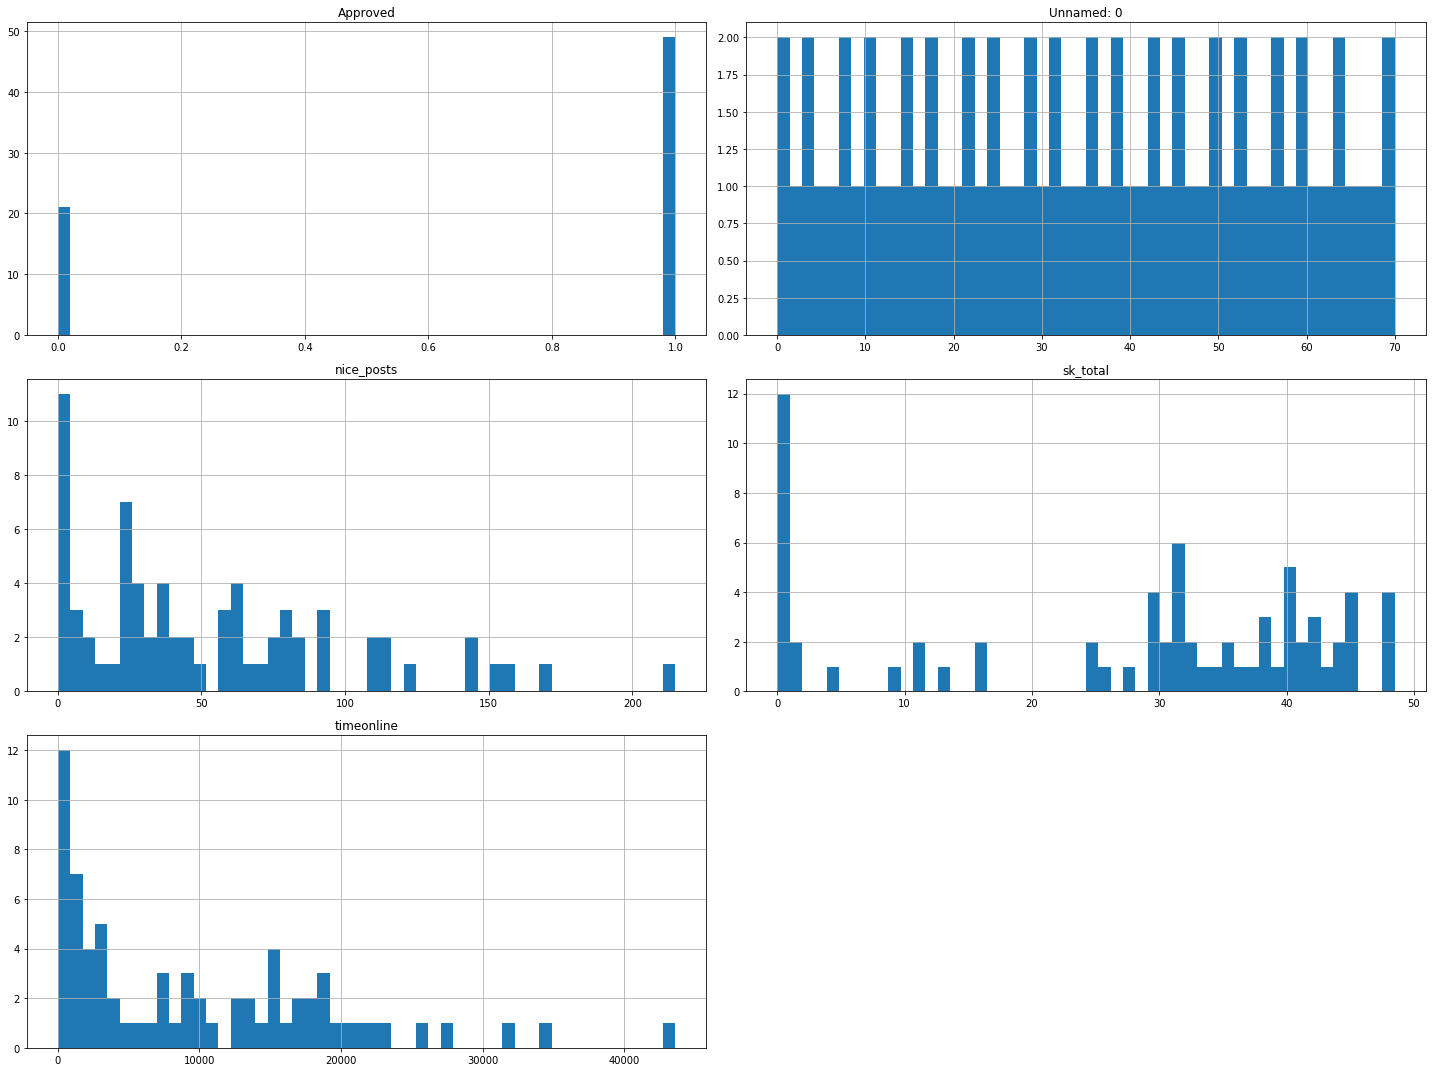

In [350]:
online_clean.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_online_basic")
plt.show()

Before going on, we analyze the students with timeline and nice_posts zero, we want to go deeper in this problem.

In [351]:
online_nonattenders=online_clean[online_clean['timeonline']== 0]
online_nonattenders.describe()
#online_nonattenders.info()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
count,9.000000,9.0,9.0,9.0,9.0
mean,46.333333,0.0,0.0,0.0,0.0
std,10.874282,0.0,0.0,0.0,0.0
min,30.000000,0.0,0.0,0.0,0.0
25%,42.000000,0.0,0.0,0.0,0.0
50%,47.000000,0.0,0.0,0.0,0.0
75%,56.000000,0.0,0.0,0.0,0.0
max,60.000000,0.0,0.0,0.0,0.0


Yes, we can delete them :)

In [352]:
online_nonposters=online_clean[online_clean['nice_posts']== 0]
online_nonposters.describe()
#online_nonposters.info()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
count,11.000000,11.000000,11.0,11.000000,11.0
mean,46.636364,156.545455,0.0,0.018182,0.0
std,13.230818,352.892155,0.0,0.040452,0.0
min,28.000000,0.000000,0.0,0.000000,0.0
25%,37.000000,0.000000,0.0,0.000000,0.0
50%,47.000000,0.000000,0.0,0.000000,0.0
75%,57.500000,0.000000,0.0,0.000000,0.0
max,68.000000,988.000000,0.0,0.100000,0.0


Some of online_nonposters have timeonline, but most possibly they left the screen open and went to sleep or sth. Because none of them has been approved.

In [353]:
online_clc=online_clean[online_clean['timeonline']!= 0]
online_clc=online_clean[online_clean['nice_posts']!= 0]
online_clc.describe()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,32.305085,11674.271186,0.830508,32.201695,63.271186
std,20.840324,9434.596481,0.378406,12.598515,46.444936
min,0.000000,368.000000,0.000000,0.900000,6.000000
25%,14.500000,3133.000000,1.000000,29.400000,27.500000
50%,31.000000,9601.000000,1.000000,34.600000,57.000000
75%,50.500000,17520.500000,1.000000,41.300000,83.500000
max,70.000000,43612.000000,1.000000,48.500000,215.000000


Let us see how these features effect a student to be approved.

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


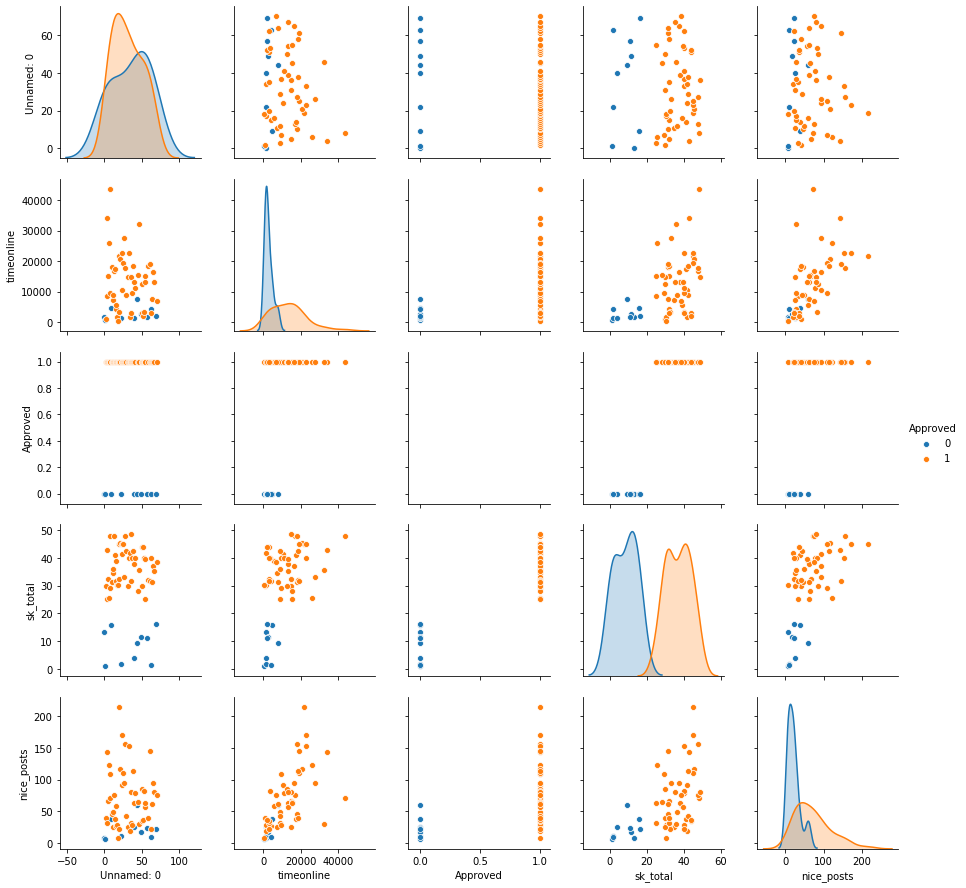

In [354]:
import seaborn as sns
sns.pairplot(online_clc, hue = 'Approved')

We clearly see that all these features are effecting to be approved. To see this another way is to get the correlation matrix.

In [355]:
online_clc.corr()

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
Unnamed: 0,1.000000,-0.146016,-0.067664,-0.037202,-0.048769
timeonline,-0.146016,1.000000,0.428238,0.473840,0.628982
Approved,-0.067664,0.428238,1.000000,0.857546,0.408801
sk_total,-0.037202,0.473840,0.857546,1.000000,0.507711
nice_posts,-0.048769,0.628982,0.408801,0.507711,1.000000


The strongest relation is between sk_total and approved. This is not a surprise. However, we see that both nice_posts and timeonline has a positive relation with sk_total. Here, by the help of correlation matrix we schoose to model sk_total w.r.t. the variable nice_posts.

Saving figure online_learning_visualization_plot


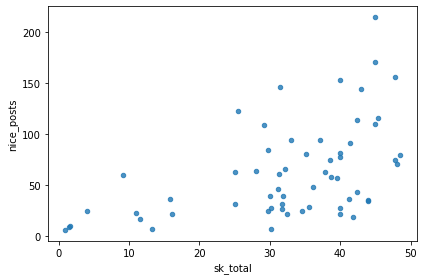

In [356]:
online_clc.plot(kind="scatter", x="sk_total", y="nice_posts",alpha=0.8)
save_fig("online_learning_visualization_plot")

Plotting the scattered plot for nice_post and sk_total shows their relation better. We try to get a univariate linear regression from these two variables.

In [357]:
import numpy as np
data_X=online_clc["sk_total"].copy()
data_labels=online_clc["nice_posts"].copy()
from sklearn.model_selection import train_test_split
data_X_train, data_X_test, data_labels_train, data_labels_test = train_test_split(data_X, data_labels, test_size=0.2, random_state=101)

In [358]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
data_X_train=pd.DataFrame(data_X_train)
#data_X_train=data_X_train.reshape(-1, 1)
lin_reg.fit(data_X_train,data_labels_train)
data_pred_train=lin_reg.predict(data_X_train)

In [359]:
data_X_test=pd.DataFrame(data_X_test)
data_pred=lin_reg.predict(data_X_test)
print("Predictions:", lin_reg.predict(data_X_test))

Predictions: [70.00208947  5.76693761 87.06754773 89.56025511 88.98501495  4.42471055
 82.08213296 63.86619437 76.90497146 79.39767885 63.48270092 95.69615022]


In [360]:
from sklearn.metrics import mean_squared_error

data_pred = lin_reg.predict(data_X_test)
lin_mse = mean_squared_error(data_labels_test, data_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

22.836217550926847

In [361]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(data_labels_test, data_pred)
lin_mae

18.132841908417262

In order to comment on errors in abetter way. We remind the maximum of the labels.

In [362]:
max(Y)

array([48.5])

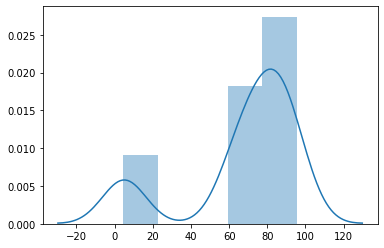

In [363]:
import seaborn as sns
sns.distplot((data_pred))

In [364]:
data_labels_pred=pd.DataFrame(data_pred)
data_labels_pred.head()

,0
0,70.002089
1,5.766938
2,87.067548
3,89.560255
4,88.985015


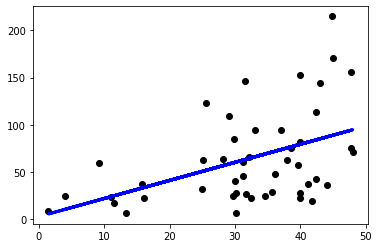

In [365]:
plt.scatter(data_X_train, data_labels_train,  color='black')
plt.plot(data_X_train, data_pred_train, color='blue', linewidth=3)

In [366]:
online_clc[online_clc['nice_posts']>=200]

,Unnamed: 0,timeonline,Approved,sk_total,nice_posts
19,19,21506.0,1,44.9,215.0


Also, this is an extraordinary student who is really social! Extracting this student may help too.

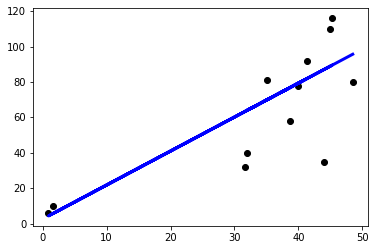

In [367]:
plt.scatter(data_X_test, data_labels_test,  color='black')
plt.plot(data_X_test, data_pred, color='blue', linewidth=3)

# Skill set analysis #
At that stage we gon on with a multi variable regression with considering more features' effect on sk_total. All the analysis done from now on could be applied on the different skill sets grades. This needs some extra exploratory analysis on the e-learning data. 

In [368]:
online.describe()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,35.000000,5.507042,4.028169,7.478873,11.366197,0.549296,18.309859,0.056338,18.957746,10279.126761,5.246479,5.078873,4.788732,5.445070,6.878873,0.704225
std,20.639767,6.480461,6.843082,12.746831,13.970622,1.350013,21.930795,0.287219,22.086477,10176.243372,3.324190,3.273396,3.448252,3.564459,3.856198,0.459639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,2.000000,0.000000,0.000000,1.500000,0.000000,6.500000,0.000000,7.000000,1627.500000,2.150000,2.050000,0.500000,1.150000,4.500000,0.000000
50%,35.000000,4.000000,3.000000,2.000000,7.000000,0.000000,14.000000,0.000000,16.000000,7664.000000,6.000000,5.700000,5.000000,6.700000,8.700000,1.000000
75%,52.500000,7.500000,5.500000,12.500000,16.000000,0.000000,24.000000,0.000000,25.500000,16574.000000,8.000000,8.000000,8.000000,8.000000,9.600000,1.000000
max,70.000000,46.000000,53.000000,90.000000,89.000000,7.000000,150.000000,2.000000,155.000000,43612.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [369]:
skills=online[['sk1_classroom','sk2_classroom','sk3_classroom','sk4_classroom','sk5_classroom']]

In [370]:
skills.corr()

,sk1_classroom,sk2_classroom,sk3_classroom,sk4_classroom,sk5_classroom
sk1_classroom,1.000000,0.965278,0.946283,0.821142,0.906980
sk2_classroom,0.965278,1.000000,0.961807,0.828269,0.916796
sk3_classroom,0.946283,0.961807,1.000000,0.795503,0.872609
sk4_classroom,0.821142,0.828269,0.795503,1.000000,0.787691
sk5_classroom,0.906980,0.916796,0.872609,0.787691,1.000000


As a conclusion we see that the effect of every skill point is strongly related with each other. So, we decide to continue on the analysis with one variable 'sk_total'. 

# Multivariate Linear Regression # 
Here, we consider the table above on feature importances. We realize that the most important features are "creative post", "time online" and "amazing post" numbers. Here, we prepare the X_train and X_test datasets. If we consider different posts as separate variables, we should delete the number of "total posts". Firstly, we import necessary packages about multivariable linear regression from scikit-learn library.

Here, we need to get the necessary dataframe for multivariate data analysis.

In [371]:
online_dropped2=online_dropped.drop(['Unnamed: 0','total_posts', 'Approved','nice_posts'],axis=1)
online_dropped2.describe()

,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk_total
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3.328571,6.300000,10.257143,0.514286,16.428571,0.057143,17.014286,9864.342857,27.144286
std,3.500399,8.045793,10.459980,1.326900,15.264405,0.289213,14.927353,9626.238283,16.510459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.250000,0.000000,6.250000,0.000000,7.000000,1613.750000,11.950000
50%,3.000000,2.000000,7.000000,0.000000,13.500000,0.000000,15.000000,7616.000000,31.700000
75%,5.000000,11.750000,16.000000,0.000000,24.000000,0.000000,25.000000,16134.750000,40.000000
max,16.000000,39.000000,42.000000,7.000000,76.000000,2.000000,64.000000,43612.000000,48.500000


In [372]:
online_dropped_X=online_dropped2.drop('sk_total',axis=1)
data_X=online_dropped_X.copy()
data_labels=online_dropped2["sk_total"].copy()
data_X_train, data_X_test, data_labels_train, data_labels_test = train_test_split(data_X, data_labels, test_size=0.2, random_state=101)


In [373]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_X_train, data_labels_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [374]:
data_predictions_tree = tree_reg.predict(data_X_train)
tree_mse = mean_squared_error(data_labels_train, data_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.7475133497774e-16

We see that the decision tree algorithm fitted very much (overfitting) to the train data set. One cause for that is the few number of instances in our dataset. Let's go on with adding a cross validation to this model.

In [375]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_X_train, data_labels_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [376]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [13.24506197 18.52543297 12.94546253 11.87335954  3.59374457 24.42969505
 14.20161963 12.50767764 19.52746783 22.13476903]
Mean: 15.298429074469116
Standard deviation: 5.7086660309951665


Minimum error in the decision tree algorithm with cross validation is 3.59374457 and the mean is 15.298429074469116.

Now, we continue with a random forest regression algorithm which uses many decision trees together.

In [377]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_X_train, data_labels_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [378]:
data_predictions_rf = forest_reg.predict(data_X_train)
forest_mse = mean_squared_error(data_labels_train, data_predictions_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4.427749325479675

We see that the random forest algorithm is also fitting to the train dataset but it has some error different than zero as we expect.

Now, we apply cross validation on the whole dataset.

In [379]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, Y.ravel(),
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [10.1322938  11.62070008 14.30078807  8.41621585 12.33715713 13.9786947
 11.80804608 12.54976226  8.30560008 10.64271779]
Mean: 11.409197583978267
Standard deviation: 1.952886395942885


We see that applying cross validation gives us a mean error with random forest algorithm. Now, we apply cross validation to the classical linear regression model.

In [380]:
scores = cross_val_score(lin_reg, X, Y.ravel(), scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean     14.102306
std       3.008242
min       9.298441
25%      12.568841
50%      13.991704
75%      15.920651
max      18.306816
dtype: float64

# SVR Support Vector Regression #

The mean error in linear regression with cross validation is not better than a random forest with cross validation as we expected. Now, we try the Support vector regression model with scaling. 

In [381]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_sc = sc_X.fit_transform(np.array(data_X))
y_sc = sc_y.fit_transform(np.array(data_labels).reshape(-1,1))
pd.DataFrame(X_sc).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
0    70 non-null float64
1    70 non-null float64
2    70 non-null float64
3    70 non-null float64
4    70 non-null float64
5    70 non-null float64
6    70 non-null float64
7    70 non-null float64
dtypes: float64(8)
memory usage: 4.5 KB


In [382]:
data_X_train_scaled, data_X_test_scaled, data_labels_train_scaled, data_labels_test_scaled = train_test_split(X_sc, y_sc, test_size=0.2, random_state=101)

In [383]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_X_train_scaled, data_labels_train_scaled.ravel())
data_predictions_svm = svm_reg.predict(data_X_train_scaled)
svm_mse = mean_squared_error(data_labels_train_scaled, data_predictions_svm)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.7569120667852232

Here, we try different scaler minmaxscaler.

In [384]:
from sklearn.preprocessing import MinMaxScaler
sc_X_mmax = MinMaxScaler()
sc_y_mmax = MinMaxScaler()
X = sc_X_mmax.fit_transform(np.array(data_X_train))
y = sc_y_mmax.fit_transform(np.array(data_labels_train).reshape(-1,1))

In [385]:
data_X_train_sc, data_X_test_sc, data_labels_train_sc, data_labels_test_sc = train_test_split(X, y, test_size=0.2, random_state=101)

In [386]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(data_X_train_sc, data_labels_train_sc.ravel())
data_predictions_svm = svm_reg.predict(data_X_train_sc)
svm_mse = mean_squared_error(data_labels_train_sc, data_predictions_svm)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.24955827800506825

Here, we can try different kernels.

In [387]:
svm_reg = SVR(kernel="rbf",gamma='scale')
svm_reg.fit(data_X_train_sc, data_labels_train_sc.ravel())
data_predictions_svm = svm_reg.predict(data_X_train_sc)
svm_mse = mean_squared_error(data_labels_train_sc, data_predictions_svm)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.17154049505619567

We see that the rmse error is very small. But to compare with random forest regression error, we compute the max of the labels. Then, we intend to make the cross validation better with a random search.

In [388]:
print(max(data_labels_train_sc))

[1.]


Here, we see the error is %17 which is really satisfying.

In [389]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=2),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

Here, we added a randomized search for a better cross validation.

In [390]:
rnd_search.fit(data_X, data_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [391]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

10.634953363162438 {'max_features': 1, 'n_estimators': 103}
10.608535980017683 {'max_features': 1, 'n_estimators': 180}
10.563015569452045 {'max_features': 1, 'n_estimators': 93}
10.93434916883633 {'max_features': 1, 'n_estimators': 15}
10.663516929908747 {'max_features': 1, 'n_estimators': 107}
10.526131534341703 {'max_features': 1, 'n_estimators': 72}
10.558421482510058 {'max_features': 1, 'n_estimators': 189}
10.93018300627654 {'max_features': 1, 'n_estimators': 21}
10.634953363162438 {'max_features': 1, 'n_estimators': 103}
10.723213880143385 {'max_features': 1, 'n_estimators': 122}


In [392]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.14001859, 0.11025967, 0.22333304, 0.01800798, 0.17258865,
       0.0086055 , 0.11740528, 0.20978129])

In [393]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 70
Data columns (total 8 columns):
helpful_post          70 non-null float64
nice_code_post        70 non-null float64
collaborative_post    70 non-null float64
confused_post         70 non-null float64
creative_post         70 non-null float64
bad_post              70 non-null float64
amazing_post          70 non-null float64
timeonline            70 non-null float64
dtypes: float64(8)
memory usage: 4.9 KB


Timeonline and collaborative_posts are two features with higher weights. 

In [401]:
data_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 57 to 70
Data columns (total 8 columns):
helpful_post          14 non-null float64
nice_code_post        14 non-null float64
collaborative_post    14 non-null float64
confused_post         14 non-null float64
creative_post         14 non-null float64
bad_post              14 non-null float64
amazing_post          14 non-null float64
timeonline            14 non-null float64
dtypes: float64(8)
memory usage: 1008.0 bytes


In [402]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(data_X_test)
final_mse = mean_squared_error(data_labels_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [403]:
final_rmse

3.303414318324264

In [404]:
final_predictions_train = final_model.predict(data_X_train)
final_mse_train = mean_squared_error(data_labels_train, final_predictions_train)
final_rmse_train = np.sqrt(final_mse_train)

In [405]:
final_rmse_train

4.03884482489309

We found reasonable amount of train data error and test error despite the fact that the dataset is very small.

In [406]:
max(data_labels)

48.5

In [407]:
(4/48.5)*100

8.24742268041237

This is a better error with %8.25.